In [1]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import numpy as np
import math as m
import cv2
import matplotlib.pylab as pl
from skimage.exposure import histogram

Максимальное значение светлоты:	 168
Минимальное значение светлоты:	 42
Контрастность:	 126


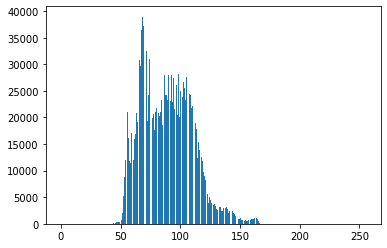

In [26]:
image = cv2.imread("test.jpg")
plt.hist(image.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig('gist.jpg')
print("Максимальное значение светлоты:\t", np.max(image))
print("Минимальное значение светлоты:\t", np.min(image))
print("Контрастность:\t", np.max(image) - np.min(image))

Максимальное значение светлоты:	 251
Минимальное значение светлоты:	 185
Контрастность:	 66


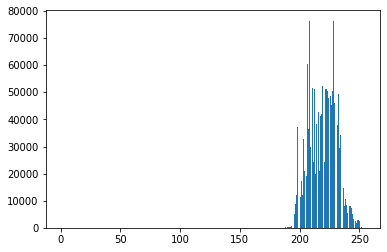

In [28]:
#логарифмическое преобразовние
image = cv2.imread("test.jpg")
def log_p(img):
    c=int(255/(np.log1p(1+np.max(img))))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for p in range(len(img[i][j])):
                img[i][j][p] = c * np.log1p(1+img[i][j][p])

log_p(image)
plt.hist(image.ravel(), bins=255, rwidth=1.8, range=(0, 255))
plt.savefig('gist_2.jpg')
cv2.imwrite('image_log.jpg',image)
print("Максимальное значение светлоты:\t", np.max(image))
print("Минимальное значение светлоты:\t", np.min(image))
print("Контрастность:\t", np.max(image) - np.min(image))

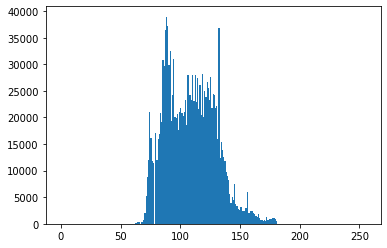

Максимальное значение светлоты:	 182
Минимальное значение светлоты:	 60
Контрастность:	 122


<Figure size 432x288 with 0 Axes>

In [42]:
#степенное
image = cv2.imread("test.jpg")
def deg(img, pow, c = 1):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for p in range(len(img[i][j])):
                img[i][j][p] = 255 * (img[i][j][p]/255) **pow

deg(image, 0.8)
plt.hist(image.ravel(), bins=255, rwidth=1.8, range=(0, 255))
plt.show()
plt.savefig('gist_3.jpg')
cv2.imwrite('image_step.jpg',image)

print("Максимальное значение светлоты:\t", np.max(image))
print("Минимальное значение светлоты:\t", np.min(image))
print("Контрастность:\t", np.max(image) - np.min(image))

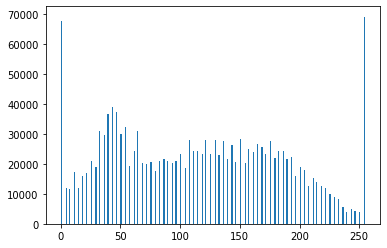

Максимальное значение светлоты:	 255
Минимальное значение светлоты:	 0
Контрастность:	 255


<Figure size 432x288 with 0 Axes>

In [37]:
#нормализация
image = cv2.imread("test.jpg")
image1N = image.copy()

image1N = cv2.normalize(image1N, None, -50, 400, norm_type=cv2.NORM_MINMAX)

plt.hist(image1N.ravel(), bins=255, rwidth=1.8, range=(0, 255))
plt.show()
plt.savefig('gist_4.jpg')
cv2.imwrite('image_norm.jpg',image1N)

print("Максимальное значение светлоты:\t", np.max(image1N))
print("Минимальное значение светлоты:\t", np.min(image1N))
print("Контрастность:\t", np.max(image1N) - np.min(image1N))

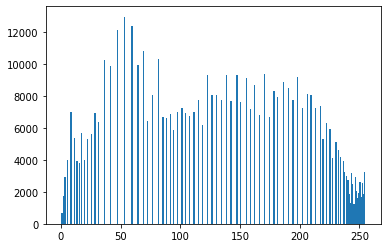

Максимальное значение светлоты:	 255
Минимальное значение светлоты:	 0
Контрастность:	 255


<Figure size 432x288 with 0 Axes>

In [38]:
#эквализация
image = cv2.imread("test.jpg")
imageQ = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imageQ = cv2.equalizeHist(imageQ)

plt.hist(imageQ.ravel(), bins=255, rwidth=1.8, range=(0, 255))
plt.show()
plt.savefig('gist_5.jpg')
cv2.imwrite('image_ekv.jpg',imageQ)

print("Максимальное значение светлоты:\t", np.max(imageQ))
print("Минимальное значение светлоты:\t", np.min(imageQ))
print("Контрастность:\t", np.max(imageQ) - np.min(imageQ))